**1. Data Collection & Loading**

In [ ]:
import kagglehub
import pandas as pd
import numpy as np

In [ ]:
dataset_path = kagglehub.dataset_download("mohamedbakhet/amazon-books-reviews")
print("Dataset downloaded to:", dataset_path)

Using Colab cache for faster access to the 'amazon-books-reviews' dataset.
Dataset downloaded to: /kaggle/input/amazon-books-reviews


In [ ]:
data=pd.read_csv(dataset_path+"/Books_rating.csv")
print("Dataset Loaded Successfully!\n")

Dataset Loaded Successfully!



In [ ]:
print("Dataset shape (rows, columns):", data.shape)

Dataset shape (rows, columns): (3000000, 10)


In [ ]:
print("Column names: \n")
for col in data.columns:
    print(col)

Column names: 

Id
Title
Price
User_id
profileName
review/helpfulness
review/score
review/time
review/summary
review/text


In [ ]:
col_info = pd.DataFrame({
    'Column Name': data.columns,
    'Data Type': data.dtypes.values
})
print(col_info)


          Column Name Data Type
0                  Id    object
1               Title    object
2               Price   float64
3             User_id    object
4         profileName    object
5  review/helpfulness    object
6        review/score   float64
7         review/time     int64
8      review/summary    object
9         review/text    object


**2. Data Cleaning**

In [ ]:
print("\nDataset information: \n")
print(data.info())


Dataset information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
None


In [ ]:
data.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
data.describe() #gives details of all the numerical columns.

,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [ ]:
print("\nUnique Title: ",data['Title'].nunique())
print("\nSample Titles: \n",data['Title'].unique()[:10])


Unique Title:  212403

Sample Titles: 
 ['Its Only Art If Its Well Hung!' 'Dr. Seuss: American Icon'
 'Wonderful Worship in Smaller Churches' 'Whispers of the Wicked Saints'
 'Nation Dance: Religion, Identity and Cultural Difference in the Caribbean'
 'The Church of Christ: A Biblical Ecclesiology for Today'
 'The Overbury affair (Avon)' 'A Walk in the Woods: a Play in Two Acts'
 'Saint Hyacinth of Poland'
 "Rising Sons and Daughters: Life Among Japan's New Young"]


In [ ]:
#checking no. of duplicates present
print("No. of Duplicated rows: ",data.duplicated().sum())

No. of Duplicated rows:  8774


In [ ]:
data.isnull().sum()

,0
Id,0
Title,208
Price,2518829
User_id,561787
profileName,561905
review/helpfulness,0
review/score,0
review/time,0
review/summary,407
review/text,8


In [ ]:
# Fill Price with mean value
data['Price'].fillna(data['Price'].mean(), inplace=True)

# Fill missing profile names
data['profileName'].fillna("Unknown User", inplace=True)

# Fill missing review summary (short text)
data['review/summary'].fillna("No Summary", inplace=True)

# Fill missing review text (full review text)
data['review/text'].fillna("No Review Provided", inplace=True)

# Fill missing User Id
data['User_id'].fillna("Unknown_User", inplace=True)

/tmp/ipython-input-2683178435.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(data['Price'].mean(), inplace=True)
/tmp/ipython-input-2683178435.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
data.isnull().sum()

,0
Id,0
Title,208
Price,0
User_id,0
profileName,0
review/helpfulness,0
review/score,0
review/time,0
review/summary,0
review/text,0


In [ ]:
# Convert review/helpfulness from "x/y" to numeric ratio x/y
data[['helpful_votes', 'total_votes']] = data['review/helpfulness'].str.split('/', expand=True).astype(int)
data['helpfulness_ratio'] = data['helpful_votes'] / data['total_votes']

In [ ]:
data.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,helpful_votes,total_votes,helpfulness_ratio
0,1882931173,Its Only Art If Its Well Hung!,21.762656,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,7,7,1.000000
1,0826414346,Dr. Seuss: American Icon,21.762656,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,10,10,1.000000
2,0826414346,Dr. Seuss: American Icon,21.762656,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",10,11,0.909091
3,0826414346,Dr. Seuss: American Icon,21.762656,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,7,1.000000
4,0826414346,Dr. Seuss: American Icon,21.762656,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,3,3,1.000000


In [ ]:
# Convert Price
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Convert review score
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Convert review time (Unix timestamp to datetime)
data['review/time'] = pd.to_datetime(data['review/time'], unit='s')

# Ensure helpfulness columns are integers and ratio has no NaN
data['helpful_votes'] = data['helpful_votes'].astype(int)
data['total_votes'] = data['total_votes'].astype(int)
data['helpfulness_ratio'].fillna(0, inplace=True)

/tmp/ipython-input-2788350453.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['helpfulness_ratio'].fillna(0, inplace=True)


In [ ]:
# Remove duplicate entries
data.drop_duplicates(inplace=True)

In [ ]:
#If a row does not have a book title, that row is usually not useful, because
#we cannot group it by book and can't analyze popularity, ratings, trends for it.

# Remove useless rows
data = data.dropna(subset=['Title'])

In [ ]:
data.isnull().sum()

,0
Id,0
Title,0
Price,0
User_id,0
profileName,0
review/helpfulness,0
review/score,0
review/time,0
review/summary,0
review/text,0


In [ ]:
print("Duplicate Rows and Useless Rows are Removed. \nNew Shape:", data.shape)
#before remove the duplicates : (3000000, 10)

Duplicate Rows and Useless Rows are Removed. 
New Shape: (2991018, 13)


In [ ]:
data.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,helpful_votes,total_votes,helpfulness_ratio
0,1882931173,Its Only Art If Its Well Hung!,21.762656,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,7,7,1.000000
1,0826414346,Dr. Seuss: American Icon,21.762656,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,10,10,1.000000
2,0826414346,Dr. Seuss: American Icon,21.762656,A3UH4UZ4RSVO82,John Granger,10/11,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",10,11,0.909091
3,0826414346,Dr. Seuss: American Icon,21.762656,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,7,1.000000
4,0826414346,Dr. Seuss: American Icon,21.762656,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,3,3,1.000000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2991018 entries, 0 to 2999999
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Id                  object        
 1   Title               object        
 2   Price               float64       
 3   User_id             object        
 4   profileName         object        
 5   review/helpfulness  object        
 6   review/score        float64       
 7   review/time         datetime64[ns]
 8   review/summary      object        
 9   review/text         object        
 10  helpful_votes       int64         
 11  total_votes         int64         
 12  helpfulness_ratio   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 319.5+ MB
None


**3. Exploratory Data Analysis (EDA)**

In [ ]:
num_cols = ['Price', 'review/score', 'helpful_votes', 'total_votes', 'helpfulness_ratio']

#data.describe()
data[num_cols].describe()


,Price,review/score,helpful_votes,total_votes,helpfulness_ratio
count,2.991018e+06,2.991018e+06,2.991018e+06,2.991018e+06,2.991018e+06
mean,2.176250e+01,4.214421e+00,4.766461e+00,6.862029e+00,4.931402e-01
std,1.050426e+01,1.203775e+00,1.763552e+01,2.127832e+01,4.307641e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.176266e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.176266e+01,5.000000e+00,1.000000e+00,2.000000e+00,5.000000e-01
75%,2.176266e+01,5.000000e+00,4.000000e+00,7.000000e+00,1.000000e+00
max,9.950000e+02,5.000000e+00,1.085500e+04,1.126200e+04,3.000000e+00


In [ ]:
median_stats = data[num_cols].median() #median_stats is a series
mode_stats = data[num_cols].mode().iloc[0] #iloc[0] - index location starts at 0
std_stats = data[num_cols].std()    # Standard deviation (Series)
var_stats = data[num_cols].var() # Variance (Series)
quantile_stats = data[num_cols].quantile([0.25, 0.50, 0.75]) # Calculate quantiles, which returns a DataFrame (3x5)

# Create a dictionary to hold the 1D series for the summary DataFrame
# summary_dict is a dictionary of Series objects
summary_dict = {
    "median": median_stats,
    "mode": mode_stats,
    "standard_deviation": std_stats,
    "variance": var_stats
}

# Add quantiles as separate columns (P25, P50, P75)
summary_dict["P_25"] = quantile_stats.loc[0.25]
summary_dict["P_50"] = quantile_stats.loc[0.50]
summary_dict["P_75"] = quantile_stats.loc[0.75]

# Summary is a dataframe created from a dictionary
summary = pd.DataFrame(summary_dict)

# Will display the full summary table
summary

,median,mode,standard_deviation,variance,P_25,P_50,P_75
Price,21.762656,21.762656,10.504259,110.339450,21.762656,21.762656,21.762656
review/score,5.000000,5.000000,1.203775,1.449074,4.000000,5.000000,5.000000
helpful_votes,1.000000,0.000000,17.635519,311.011547,0.000000,1.000000,4.000000
total_votes,2.000000,0.000000,21.278323,452.767040,0.000000,2.000000,7.000000
helpfulness_ratio,0.500000,0.000000,0.430764,0.185558,0.000000,0.500000,1.000000


In [ ]:
top_authors = data['profileName'].value_counts().head(10)

top_authors


,count
profileName,
Unknown User,558664
Midwest Book Review,5769
A Customer,5009
Harriet Klausner,3602
"E. A Solinas ""ea_solinas""",3139
"Shalom Freedman ""Shalom Freedman""",1995
"Blue Tyson ""- Research Finished""",1804
John,1697
"Donald Mitchell ""Jesus Loves You!""",1452


In [ ]:
import re #Imports Python’s regular expressions module.
# re provides re.search, re.match, re.compile, etc., used to search text patterns.
# Needed because the code uses re.search() to look for genre words inside titles.

# Creates a Python list called genre_keywords.
genre_keywords = [
    "Fantasy", "Romance", "Thriller", "Horror", "Science Fiction",
    "Sci-Fi", "Biography", "History", "Mystery", "Children", "Fiction",
    "Non-Fiction", "Education", "Poetry", "Comics"
]

# Defines a function named extract_genre that accepts one argument title.
def extract_genre(title):
    for genre in genre_keywords:      # Starts a loop that iterates over each string in genre_keywords.
        if re.search(genre, str(title), re.IGNORECASE): # re.search(pattern, text, flags) looks for pattern anywhere in text.
            return genre # If the if is True, the function immediately returns the matching genre keyword.
    return "Unknown" # Executed only if no keyword matched after the whole loop.

data["genre"] = data["Title"].apply(extract_genre)

popular_genres = data["genre"].value_counts().head(10)

popular_genres

,count
genre,
Unknown,2865227
History,34442
Children,19589
Romance,17254
Mystery,15643
Biography,14756
Fiction,9151
Education,4206
Poetry,2766


In [ ]:
top_rated_books = data.sort_values(by='review/score', ascending=False)[['Title','review/score','Price']].head(10)

top_rated_books


,Title,review/score,Price
2999998,The Idea of History,5.0,21.762656
2999993,The Idea of History,5.0,21.762656
1,Dr. Seuss: American Icon,5.0,21.762656
2,Dr. Seuss: American Icon,5.0,21.762656
2999976,Better Homes and Gardens Casual Entertaining C...,5.0,21.762656
2999974,My Life,5.0,21.762656
2999973,My Life,5.0,21.762656
2999971,My Life,5.0,21.762656
2999970,My Life,5.0,21.762656
2999969,My Life,5.0,21.762656


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

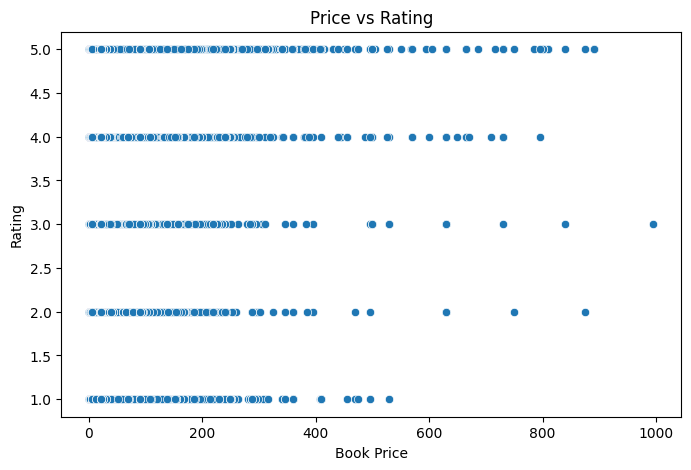

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Price', y='review/score')
plt.title("Price vs Rating")
plt.xlabel("Book Price")
plt.ylabel("Rating")
plt.show()

* Prices vary more widely, but the ratings do not show a strong upward or downward pattern.
* There is no strong relationship between price and rating.

So we can conclude that the books do not receive higher or lower ratings based on their price. Readers judge books primarily on quality and content, not cost.

**4. Data Visualization**

**Rating Distribution (Histogram + KDE)**

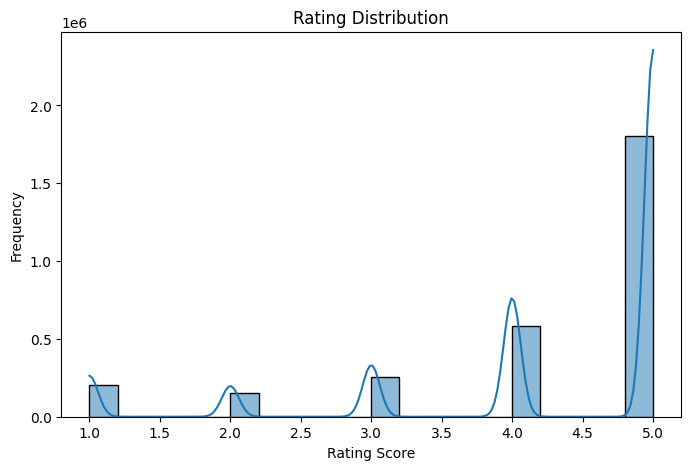

In [ ]:
# (Histogram + KDE using seaborn)

plt.figure(figsize=(8,5))
sns.histplot(data['review/score'], kde=True, bins=20)
plt.title("Rating Distribution")
plt.xlabel("Rating Score")
plt.ylabel("Frequency")
plt.show()


The histogram shows how many reviews fall under each rating score, and the KDE curve provides a smooth shape of this distribution. From the chart, we can see that:

* 5-star ratings are the most common, meaning many readers were highly satisfied with the books.

* 4-star ratings are also frequent, showing generally positive experiences.

* 3-star ratings appear less often, suggesting some average or mixed opinions.

* 1-star and 2-star ratings are rare, meaning very few readers were dissatisfied.

This creates a peak around the 4.0–5.0 range and a long tail toward the lower ratings.
This pattern indicates that:

Most users gave positive reviews.

Only a small number of users had negative experiences.

If there are a few isolated low ratings (like 1-star reviews), they may represent books that were controversial, received mixed reactions, or simply did not meet expectations for some readers.

**Top-Rated Authors**

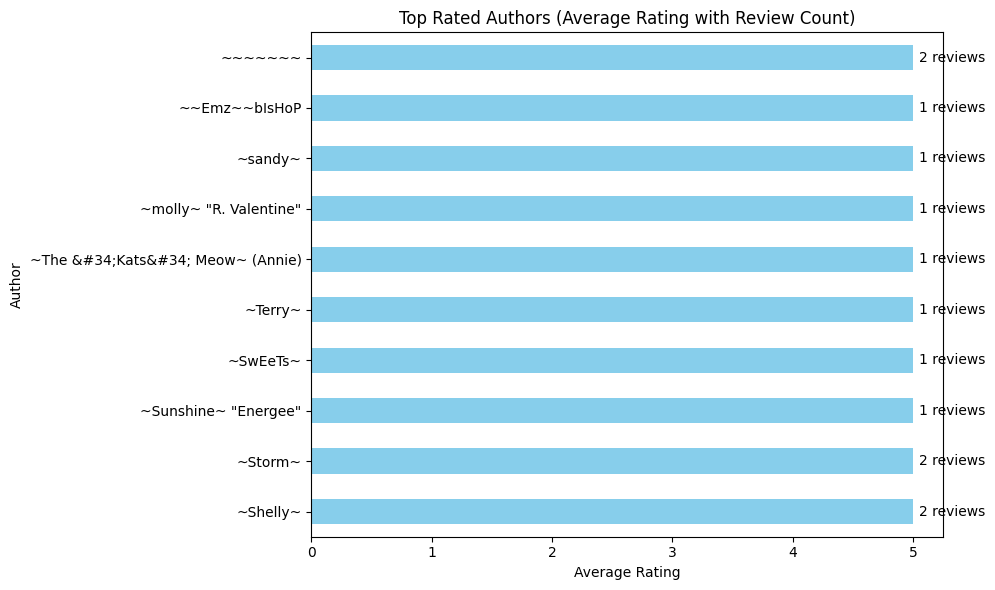

In [ ]:
# Calculate both average rating and review count per author
author_stats = data.groupby('profileName').agg({
    'review/score': 'mean',
    'Title': 'count'
}).rename(columns={'review/score': 'Average Rating', 'Title': 'Review Count'})

# Select top 10 authors by average rating
top_authors_by_rating = author_stats.sort_values(by='Average Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_authors_by_rating['Average Rating'].plot(kind='barh', color='skyblue')
plt.title("Top Rated Authors (Average Rating with Review Count)")
plt.xlabel("Average Rating")
plt.ylabel("Author")

# Add review counts as text labels
for i, (rating, count) in enumerate(zip(top_authors_by_rating['Average Rating'], top_authors_by_rating['Review Count'])):
    plt.text(rating + 0.05, i, f"{count} reviews", va='center')

# Show highest-rated author at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

This plot shows the average rating and number of reviews for the top 10 authors in the dataset.

Each horizontal bar represents an author’s average rating, while the text labels beside the bars indicate how many reviews that author received. The authors are sorted by their average rating, with the highest-rated authors displayed at the top.

From this chart, we can easily identify:
* Which authors consistently receive high ratings from readers
* Which authors are also popular, based on the number of reviews
* How author popularity relates to perceived quality

Overall, this visualization helps highlight authors who are both highly rated and widely read, offering insight into reader preferences and author reputation.

**Price vs Rating**

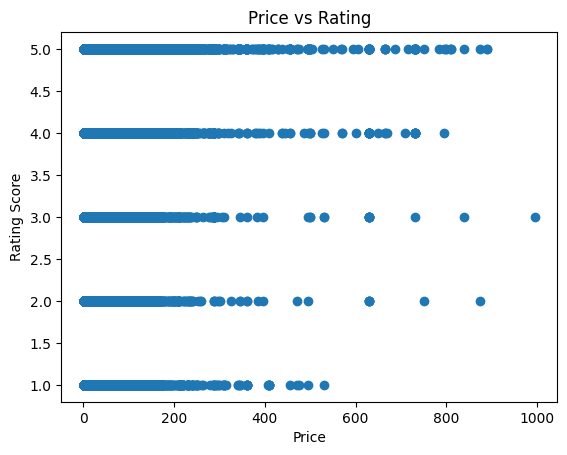

In [ ]:
plt.figure()
plt.scatter(data['Price'], data['review/score'])
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating Score")
plt.show()


The scatter plot compares the price of books with their rating scores. If the points are spread out without a clear pattern, it suggests that price does not strongly influence ratings. In many cases, both expensive and low-cost books receive high ratings, meaning readers judge books more on content than price.

**Yearly Review Trend**

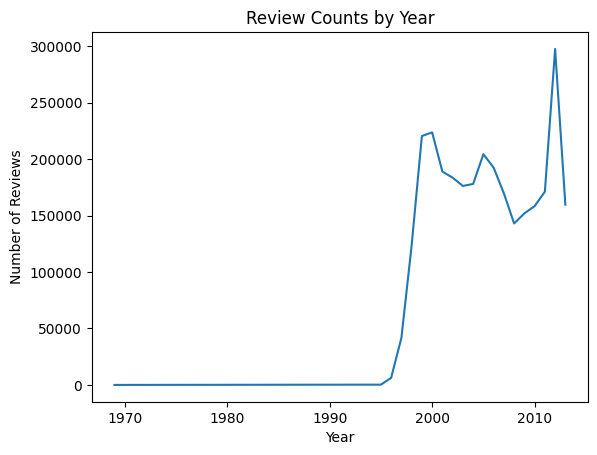

In [ ]:
# Convert timestamp to year (if not already done)
data['review_year'] = data['review/time'].dt.year

yearly_trend = data.groupby('review_year').size()

plt.figure()
yearly_trend.plot()
plt.title("Review Counts by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


The line chart shows how many reviews were written each year. An upward trend indicates that interest in reviewing books has grown over time, possibly due to increased online activity. A downward trend could suggest less user engagement in recent years. This visualization helps understand how reader participation changes.

**Insights**

* Most users gave high ratings — The majority of reviews are 4 or 5 stars, showing that readers were generally satisfied with the books they purchased or reviewed.
* Very few negative reviews — 1-star and 2-star ratings are rare, indicating that dissatisfaction among readers is minimal.
* Top-rated authors show both quality and popularity — The best-rated authors not only maintain high average ratings but also have a large number of reviews, reflecting strong reader trust and recognition.
* Price does not strongly affect ratings — The Price vs Rating plot shows no clear pattern, suggesting that readers evaluate books mainly based on content quality rather than cost.
* Steady or growing interest in book reviews — The yearly trend chart shows consistent user activity over time, with peaks that may align with the growth of online book platforms.
* Helpful review patterns — Reviews with higher helpfulness ratios tend to have more balanced and descriptive comments, indicating that detailed reviews are more valued by readers.